In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import HTML
import warnings

pd.set_option('max_columns', 100)
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors=10)
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train_labels = pd.read_csv("train_labels.csv")
#test = pd.read_csv("test.csv")
#specs = pd.read_csv("specs.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [4]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


In [5]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


### check for missing info

In [7]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(10)

,Total,Percent
world,0,0.0
type,0,0.0
title,0,0.0
game_time,0,0.0
event_code,0,0.0
event_count,0,0.0
installation_id,0,0.0
event_data,0,0.0
timestamp,0,0.0
game_session,0,0.0


### event_id & game_session

It is said to be randomly generated, so should be nothing special.   
event_id - Randomly generated unique identifier for the event type. Maps to event_id column in specs table.  
game_session - Randomly generated unique identifier grouping events within a single game or video play session.

In [8]:
print(len(np.unique(train.event_id)))
print(len(np.unique(train.game_session)))

print(len(np.unique(train.installation_id)))
print(len(np.unique(train_labels.installation_id)))

#print(len(np.unique(test.event_id)))
#print(len(np.unique(test.game_session)))

384
303319
17000
3614


### timestamp

In [9]:
train_timestamp = pd.to_datetime(train.timestamp)
train_timestamp.max(), train_timestamp.min()

(Timestamp('2019-10-22 17:41:45.983000+0000', tz='UTC'),
 Timestamp('2019-07-23 02:12:17.279000+0000', tz='UTC'))

In [10]:
train["date"] = train_timestamp.dt.date
train["hour"] = train_timestamp.dt.hour
train["month"] = train_timestamp.dt.month
train["dayofweek"] = train_timestamp.dt.dayofweek

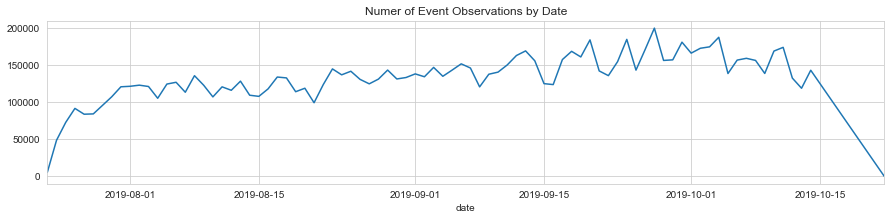

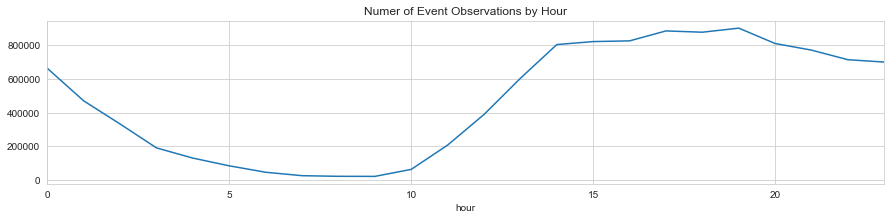

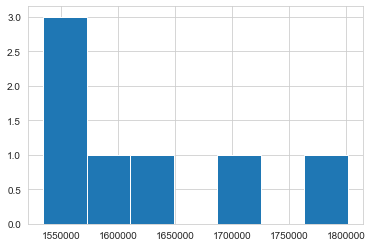

In [11]:
train.groupby('date')['date'].agg('count').plot(figsize=(15, 3),
         title='Numer of Event Observations by Date')
plt.show()

train.groupby('hour')['hour'].agg('count').plot(figsize=(15, 3),
         title='Numer of Event Observations by Hour')
plt.show()

train.groupby('dayofweek')['dayofweek'].agg('count').hist(bins=7)
plt.show()

### installation_id

In [12]:
installation_id = train.installation_id
train.groupby('installation_id')["event_id"].agg('count').sort_values(ascending=False).head()

installation_id
f1c21eda    58988
4d7d3d97    32749
d25338cb    31826
cff5a334    30918
c9ea32e9    30402
Name: event_id, dtype: int64

### event_count

In [13]:
event_count = train.event_count
event_count.nunique()

3368

[   1    2    3 ... 3366 3367 3368]


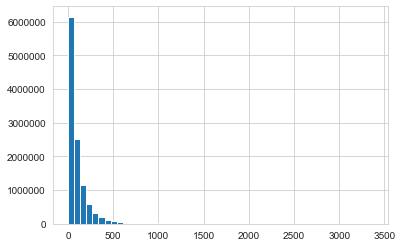

In [14]:
n = np.unique(event_count)

print(n)
plt.hist(event_count, bins=50)
plt.show()

In [15]:
train.groupby("event_count")["event_count"].agg('count').sort_values(ascending=True).head(10)

event_count
3368    1
3248    1
3247    1
3246    1
3245    1
3244    1
3243    1
3242    1
3241    1
3240    1
Name: event_count, dtype: int64

### event_code

The file train_labels.csv has been provided to show how these groups would be computed on the assessments in the training set. Assessment attempts are captured in event_code 4100 for all assessments except for Bird Measurer, which uses event_code 4110. If the attempt was correct, it contains "correct":true

### check if all rows contain "correct" in event_data if we drop all the rows without assessment

In [16]:
keep_id = train[train.type == "Assessment"][['installation_id']].drop_duplicates()
train_ass = pd.merge(train, keep_id, on="installation_id", how="inner")

train_ass.head(15)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,month,dayofweek
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-08-06,4,8,1
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-08-06,4,8,1
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
5,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:18.474Z,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
6,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:19.365Z,"{""coordinates"":{""x"":817,""y"":617,""stage_width"":...",0006a69f,5,4070,4820,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
7,1bb5fbdb,2b9d5af79bcdb79f,2019-08-06T04:58:21.490Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,6,3110,6954,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
8,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:22.732Z,"{""coordinates"":{""x"":809,""y"":180,""stage_width"":...",0006a69f,7,4070,8187,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
9,5e812b27,2b9d5af79bcdb79f,2019-08-06T04:58:23.295Z,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",0006a69f,8,4030,8745,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1


In [17]:
train_ass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8294138 entries, 0 to 8294137
Data columns (total 15 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
date               object
hour               int64
month              int64
dayofweek          int64
dtypes: int64(6), object(9)
memory usage: 1012.5+ MB


In [18]:
train_ass.groupby("installation_id")["event_count"].agg('count')

installation_id
0006a69f    3801
0006c192    2224
00129856     830
001d0ed0    1028
00225f67     957
            ... 
ff9715db    2061
ffc90c32    2004
ffd2871d    2450
ffe3b25d     371
ffeb0b1b    1593
Name: event_count, Length: 4242, dtype: int64

In [19]:
train_labels.groupby("installation_id")["installation_id"].agg('count')

installation_id
0006a69f    5
0006c192    3
00129856    1
001d0ed0    5
00225f67    1
           ..
ff9305d7    4
ff9715db    9
ffc90c32    6
ffd2871d    1
ffeb0b1b    3
Name: installation_id, Length: 3614, dtype: int64

In [20]:
unique_installation_id_train = list(np.unique(train_ass.installation_id))
unique_installation_id_label = list(np.unique(train_labels.installation_id))

# check if all installation id that exist in labels exist in train_ass
tmp = []
for idx in unique_installation_id_label:
    if idx not in unique_installation_id_train:
        tmp.append(idx)
print(len(tmp))        

0


In [21]:
sample_data = train_ass[train_ass.title == "Mushroom Sorter (Assessment)"][train_ass.game_session == "901acc108f55a5a1"]#[train_ass.game_session == "0006a69f"]
sample_data

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,month,dayofweek
647,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
648,db02c830,901acc108f55a5a1,2019-08-06T05:22:01.400Z,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
649,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:01.403Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
650,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:05.242Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
651,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:05.244Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
652,28ed704e,901acc108f55a5a1,2019-08-06T05:22:07.812Z,"{""height"":4,""coordinates"":{""x"":329,""y"":550,""st...",0006a69f,6,4025,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
653,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:07.812Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,7,3110,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
654,9d29771f,901acc108f55a5a1,2019-08-06T05:22:07.816Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,8,3021,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
655,c74f40cd,901acc108f55a5a1,2019-08-06T05:22:08.427Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,9,3121,7084,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1
656,28ed704e,901acc108f55a5a1,2019-08-06T05:22:09.742Z,"{""height"":1,""coordinates"":{""x"":176,""y"":526,""st...",0006a69f,10,4025,8400,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-08-06,5,8,1


In [22]:
train_labels[train_labels.installation_id == "0006a69f"]

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [23]:
unique_game_session_train = list(np.unique(train_ass.game_session))
unique_game_session_label = list(np.unique(train_labels.game_session))

print(len(unique_game_session_train), len(unique_game_session_label))

195445 17690


In [24]:
train_final = train_ass[train_ass['installation_id'].isin(train_labels['installation_id'])]

train_final.groupby("installation_id")["event_count"].agg('count')

installation_id
0006a69f    3801
0006c192    2224
00129856     830
001d0ed0    1028
00225f67     957
            ... 
ff9305d7    3946
ff9715db    2061
ffc90c32    2004
ffd2871d    2450
ffeb0b1b    1593
Name: event_count, Length: 3614, dtype: int64

In [25]:
(train_final.shape, train_labels.shape)

((7734558, 15), (17690, 7))

In [26]:
train_final.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,month,dayofweek
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-08-06,4,8,1
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-08-06,4,8,1
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-08-06,4,8,1


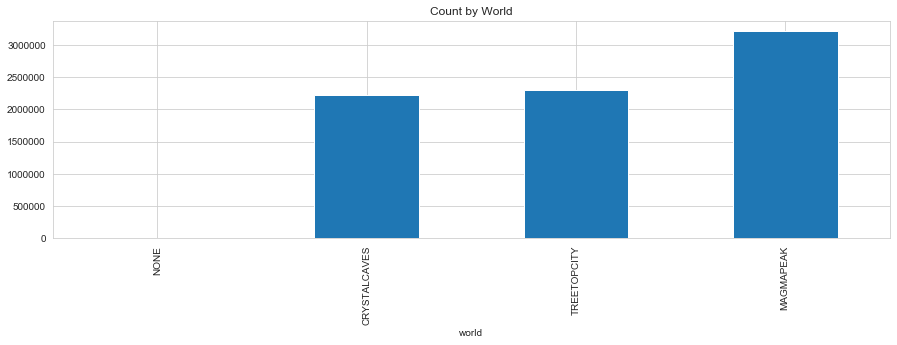

In [27]:
train_final.groupby('world')['event_id'].count().sort_values().plot(kind='bar', figsize=(15, 4), title='Count by World')
plt.show()

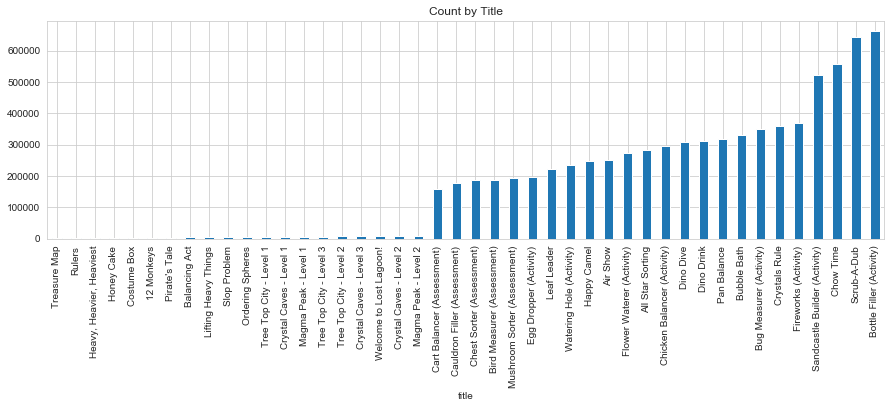

In [28]:
train_final.groupby('title')['event_id'].count().sort_values().plot(kind='bar', figsize=(15, 4), title='Count by Title')
plt.show()

In [29]:
train_final["timestamp"] = pd.to_datetime(train_final.timestamp)

In [30]:
train_final2 = train_final[train_final['game_session'].isin(train_labels['game_session'])]

train_final2.info(), train_final2.game_session.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865447 entries, 647 to 8294137
Data columns (total 15 columns):
event_id           865447 non-null object
game_session       865447 non-null object
timestamp          865447 non-null datetime64[ns, UTC]
event_data         865447 non-null object
installation_id    865447 non-null object
event_count        865447 non-null int64
event_code         865447 non-null int64
game_time          865447 non-null int64
title              865447 non-null object
type               865447 non-null object
world              865447 non-null object
date               865447 non-null object
hour               865447 non-null int64
month              865447 non-null int64
dayofweek          865447 non-null int64
dtypes: datetime64[ns, UTC](1), int64(6), object(8)
memory usage: 105.6+ MB


(None, 17690)

In [40]:
grouped1 = pd.DataFrame(train_final2.groupby(["game_session"])["event_code"].max())
grouped2 = pd.DataFrame(train_final2.groupby(["game_session"])["event_count"].sum())
grouped3 = pd.DataFrame(train_final2.groupby(["game_session"])["world"].first())
grouped4 = pd.DataFrame(train_final2.groupby(["game_session"])["title"].first())
grouped5 = pd.DataFrame(train_final2.groupby(["game_session"])["game_time"].max())

grouped = grouped1.join(grouped2).join(grouped3).join(grouped5)
grouped = grouped.dropna(axis=0)
grouped.head()

,event_code,event_count,world,game_time
game_session,,,,
00097cda27afb726,4100,666,TREETOPCITY,27810
000f68cff32664ef,4100,20301,CRYSTALCAVES,118447
0014403daadf67aa,4110,3160,TREETOPCITY,719990
0014daa1d3e26eb2,4100,2628,TREETOPCITY,61995
001c49e9e9968dbe,4110,946,TREETOPCITY,39023


In [41]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17690 entries, 00097cda27afb726 to fff641eaf483ae2b
Data columns (total 4 columns):
event_code     17690 non-null int64
event_count    17690 non-null int64
world          17690 non-null object
game_time      17690 non-null int64
dtypes: int64(3), object(1)
memory usage: 691.0+ KB


In [42]:
data = train_labels.merge(grouped, on="game_session")
data.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,event_code,event_count,world,game_time
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3,4100,630,TREETOPCITY,26827
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0,4110,3828,TREETOPCITY,92799
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3,4100,1176,TREETOPCITY,39803
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2,4100,903,TREETOPCITY,31843
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3,4110,528,TREETOPCITY,36368


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17690 entries, 0 to 17689
Data columns (total 11 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
event_code         17690 non-null int64
event_count        17690 non-null int64
world              17690 non-null object
game_time          17690 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 1.6+ MB


In [54]:
X = data[["title", "event_code", "world", "game_time", "event_count"]].values
y = data["accuracy_group"].values

## Model Training

In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [56]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=99)

In [69]:
ohe1 = OneHotEncoder(sparse=False)
ohe2 = OneHotEncoder(sparse=False)
ohe3 = OneHotEncoder(sparse=False)
lbl1 = LabelEncoder()
lbl2 = LabelEncoder()
lbl3 = LabelEncoder()
std = StandardScaler()

x1 = lbl1.fit_transform(Xtr[:, 0]).reshape(-1, 1)
x2 = lbl2.fit_transform(Xtr[:, 1]).reshape(-1, 1)
x3 = lbl3.fit_transform(Xtr[:, 2]).reshape(-1, 1)
x1 = ohe1.fit_transform(x1)
x2 = ohe2.fit_transform(x2)
x3 = ohe3.fit_transform(x3)
x4 = std.fit_transform(Xtr[:, -2:])
Xtr = np.concatenate([x1, x2, x3, x4], axis=-1)

x1 = lbl1.transform(Xte[:, 0]).reshape(-1, 1)
x2 = lbl2.transform(Xte[:, 1]).reshape(-1, 1)
x3 = lbl3.transform(Xte[:, 2]).reshape(-1, 1)
x1 = ohe1.fit_transform(x1)
x2 = ohe2.fit_transform(x2)
x3 = ohe3.fit_transform(x3)
x4 = std.transform(Xte[:, -2:])
Xte = np.concatenate([x1, x2, x3, x4], axis=-1)

In [71]:
dtc = LogisticRegression()
dtc.fit(Xtr, ytr)

ytr_ = dtc.predict(Xtr)
print(classification_report(ytr, ytr_))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      3398
           1       0.56      0.16      0.25      1928
           2       0.19      0.00      0.01      1754
           3       0.65      0.91      0.76      7072

    accuracy                           0.61     14152
   macro avg       0.47      0.40      0.38     14152
weighted avg       0.54      0.61      0.54     14152



In [72]:
yte_ = dtc.predict(Xte)
print(classification_report(yte, yte_))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       831
           1       0.55      0.19      0.28       483
           2       0.21      0.01      0.01       451
           3       0.66      0.92      0.77      1773

    accuracy                           0.61      3538
   macro avg       0.48      0.41      0.40      3538
weighted avg       0.55      0.61      0.55      3538



In [73]:
cohen_kappa_score(yte, yte_)

0.3374065964372377

## Test set prediction

In [74]:
test = pd.read_csv("test.csv")
test.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156414 entries, 0 to 1156413
Data columns (total 11 columns):
event_id           1156414 non-null object
game_session       1156414 non-null object
timestamp          1156414 non-null object
event_data         1156414 non-null object
installation_id    1156414 non-null object
event_count        1156414 non-null int64
event_code         1156414 non-null int64
game_time          1156414 non-null int64
title              1156414 non-null object
type               1156414 non-null object
world              1156414 non-null object
dtypes: int64(3), object(8)
memory usage: 97.1+ MB


In [78]:
grouped1_ = pd.DataFrame(test.groupby(["game_session"])["event_code"].max())
grouped2_ = pd.DataFrame(test.groupby(["game_session"])["event_count"].sum())
grouped3_ = pd.DataFrame(test.groupby(["game_session"])["world"].first())
grouped4_ = pd.DataFrame(test.groupby(["game_session"])["title"].first())
grouped5_ = pd.DataFrame(test.groupby(["game_session"])["game_time"].max())
grouped6_ = pd.DataFrame(test.groupby(["game_session"])["installation_id"].first())

grouped_ = grouped1_.join(grouped2_).join(grouped3_).join(grouped5_).join(grouped6_)
grouped_ = grouped_.dropna(axis=0)
grouped_.head()

,event_code,event_count,world,game_time,installation_id
game_session,,,,,
000326e9d4516dd0,4090,45451,TREETOPCITY,209785,48166507
0003a9881ca100aa,4070,4656,TREETOPCITY,152639,13a0754c
00094643cae0f886,2000,1,TREETOPCITY,0,a6f65253
000ccfa39b7568d7,4070,496,TREETOPCITY,58317,c42aeee6
001352e3c9cde9dd,2000,1,TREETOPCITY,0,7b728c89


In [81]:
grouped_.installation_id.nunique()

1000